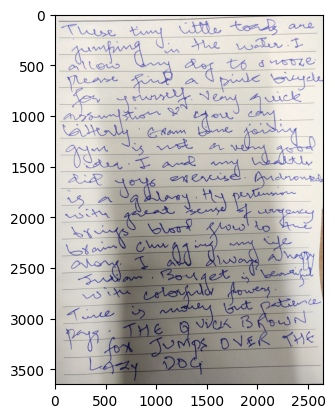

In [13]:
from PIL import Image
import os
from matplotlib import pyplot as plt
dir = 'data/valid'
for file in os.listdir(dir):
    path = os.path.join(dir,file)
    image = Image.open(path)
    plt.imshow(image)

In [1]:
import cv2, imghdr, os
data_dir = 'data'
os.listdir(data_dir)

C:\Users\aswin\AppData\Local\Temp\ipykernel_10488\951059727.py:1: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import cv2, imghdr, os


['Invalid', 'valid']

In [2]:
image_ext = ['jpeg','jpg','png','bmp']
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        try:    
            image_path = os.listdir(os.path.join(data_dir,image_class,image))
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_ext:
                os.remove(image_path)
        except Exception as e:
            print("no remove")

no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove


In [3]:
import os
import albumentations as A
from PIL import Image
import numpy as np

def augment_and_save(image_path, save_path):
    image = Image.open(image_path)
    image = np.array(image)
    augmentations = A.Compose([
        A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.1, rotate_limit=10, p=1),
        A.RandomBrightnessContrast(p=1),
        A.HorizontalFlip(p=0.5)  # Apply horizontal flip with a probability of 0.5
    ])

    augmented_image = augmentations(image=image.copy())["image"]
    augmented_image = Image.fromarray(augmented_image)

    augmented_image.save(save_path)


image_directory = "data/invalid"
for filename in os.listdir(image_directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(image_directory, filename)
        save_path = os.path.join(image_directory, f"augmented_{filename}")
        augment_and_save(image_path, save_path)


In [4]:
import tensorflow as tf
import albumentations as A
import numpy as np

data = tf.keras.utils.image_dataset_from_directory(
    directory="data",
    image_size=(500, 500),
    shuffle=True,
    seed=42
)

Found 231 files belonging to 2 classes.


In [18]:
#data = data.map(lambda x, y: (tf.image.rgb_to_grayscale(x),y))

In [5]:
iter = data.as_numpy_iterator()
batch = iter.next()
batch[0].shape

(32, 500, 500, 3)

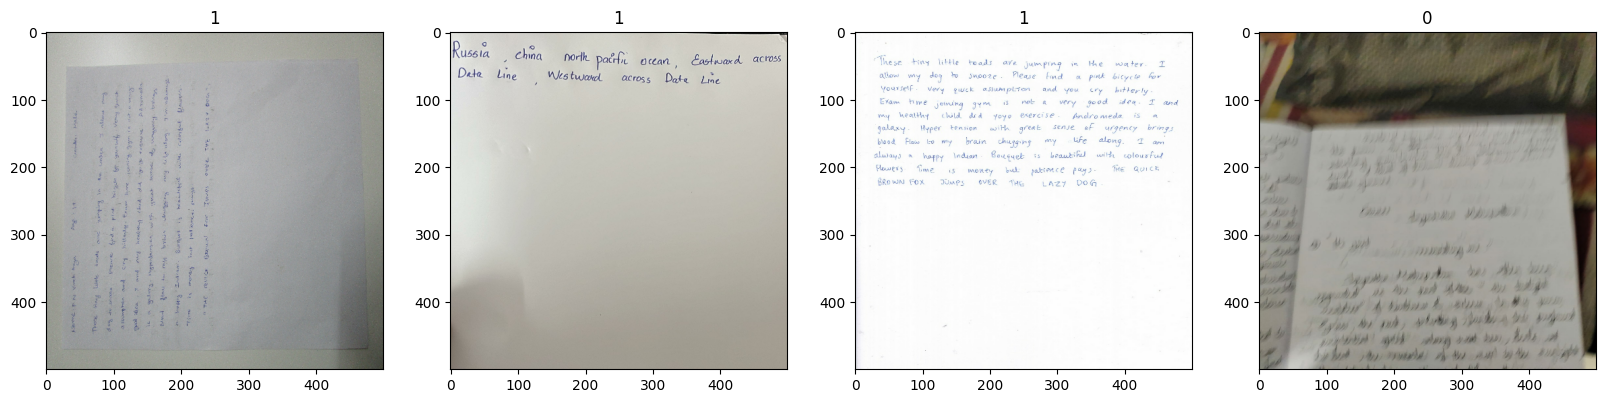

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [7]:
data = data.map(lambda x,y: (x/255.0,y))

In [8]:
batch = data.as_numpy_iterator().next()
batch[0].max()

1.0

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.3)

In [16]:
len(data)

8

In [17]:
print(train_size,val_size,test_size)

5 1 2


In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Model 1

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.applications import DenseNet121, DenseNet169

base_model = DenseNet169(weights='imagenet', include_top=False, input_shape=(500, 500, 3))

base_model.trainable = False
model = Sequential()
model.add(base_model)
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 15, 15, 1664)      12642880  
                                                                 
 conv2d (Conv2D)             (None, 13, 13, 256)       3834112   
                                                                 
 max_pooling2d (MaxPooling2  (None, 6, 6, 256)         0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 6, 6, 256)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 128)         295040    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 2, 2, 128)         0         
 g2D)                                                   

In [20]:
model.fit(train, epochs = 4,validation_data= val)

Epoch 1/4
5/5 [==============================] - 75s 13s/step - loss: 1.7086 - accuracy: 0.4812 - val_loss: 0.5254 - val_accuracy: 0.8125
Epoch 2/4
5/5 [==============================] - 60s 12s/step - loss: 0.4739 - accuracy: 0.7625 - val_loss: 0.1957 - val_accuracy: 0.9375
Epoch 3/4
5/5 [==============================] - 60s 12s/step - loss: 0.2439 - accuracy: 0.9062 - val_loss: 0.2238 - val_accuracy: 0.9688
Epoch 4/4
5/5 [==============================] - 60s 12s/step - loss: 0.1033 - accuracy: 0.9688 - val_loss: 0.0532 - val_accuracy: 0.9688


In [21]:
model.evaluate(test)

2/2 [==============================] - 15s 2s/step - loss: 0.0812 - accuracy: 0.9744


[0.0811706930398941, 0.9743589758872986]

In [22]:
model.save('97.5_per.h5')

c:\Users\aswin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Testing

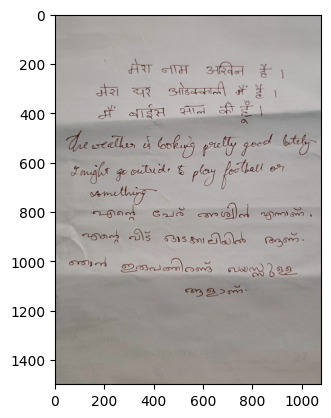

In [35]:
test = cv2.imread('WhatsApp Image 2023-12-27 at 13.21.48_7d8f97d7.jpg')
plt.imshow(test)

In [29]:
from keras.models import load_model
import tensorflow as tf
import numpy as np
image = cv2.imread('WhatsApp Image 2023-12-27 at 13.21.48_7d8f97d7.jpg')
resize = tf.image.resize(image, (500,500))
np.expand_dims(resize, 0).shape
value = model.predict(np.expand_dims(resize/255 , 0))

1/1 [==============================] - 1s 546ms/step


In [30]:
value

array([[0.03284578]], dtype=float32)

In [31]:
if value>0.5:
    print('valid')
else:
    print('invalid')

invalid


**Some Preprocessing Test**

**Sharpening Works**

In [51]:
from skimage.filters import unsharp_mask
from skimage.io import imread
from skimage.filters import threshold_otsu
import cv2
img = imread('1.jpg')
edge_laplace = laplace(img, ksize=3)
variance_laplacian = variance(edge_laplace)
max_laplacian = np.amax(edge_laplace)
img_thresholded = threshold_otsu(img)
img_sharpened = unsharp_mask(img, radius=1, amount=0.5)
cv2.imshow('sharpened',img_sharpened)
cv2.imshow('normal',img)

cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\aswin\AppData\Local\Temp\ipykernel_14620\521319746.py:11: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (1136, 920, 3) looks like that of an RGB image.
  img_thresholded = threshold_otsu(img)


.

**Orientation Fix**

.

In [12]:
import cv2
import numpy as np


def detect_orientation(image_path):

  original_image = cv2.imread(image_path)
  gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
  _, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
  contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  largest_contour = max(contours, key=cv2.contourArea)
  x, y, w, h = cv2.boundingRect(largest_contour)
  horizontal_lines = np.nonzero(np.sum(binary_image, axis=1))[0]
  vertical_projection = np.sum(binary_image, axis=0)
  vertical_lines = np.nonzero(vertical_projection)[0]

  if len(vertical_lines) > 2 * len(horizontal_lines):
    return original_image, None

  rotation_angle = 0
  if h > w:
    rotation_angle = -90 
  else:
    rotation_angle = 90 

  rotated_image = cv2.rotate(original_image, cv2.ROTATE_90_COUNTERCLOCKWISE)

  return original_image, rotated_image

original_image, rotated_image = detect_orientation("test_rotation_1.jpg")

if rotated_image is not None:
  cv2.imshow("Original Image", original_image)
  cv2.imshow("Rotated Image", rotated_image)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

else:
  print("Image is already oriented correctly.")


DATA

In [29]:
import pandas as pd
df = pd.read_csv('data1.csv')

In [30]:
for i in range(103):
    df['Handwriting Sample'][i] = df['Handwriting Sample'][i][df['Handwriting Sample'][i].find('(')+1:df['Handwriting Sample'][i].find(')')]

C:\Users\aswin\AppData\Local\Temp\ipykernel_220\3548324195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Handwriting Sample'][i] = df['Handwriting Sample'][i][df['Handwriting Sample'][i].find('(')+1:df['Handwriting Sample'][i].find(')')]
C:\Users\aswin\AppData\Local\Temp\ipykernel_220\3548324195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Handwriting Sample'][i] = df['Handwriting Sample'][i][df['Handwriting Sample'][i].find('(')+1:df['Handwriting Sample'][i].find(')')]
C:\Users\aswin\AppData\Local\Temp\ipykernel_220\3548324195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [31]:
df.head(5)

,Survey Response,Date,Email ID,Gender,Age,Handwriting Sample
0,12/18/2023 11:28am,12-18-2023,achal.ajith@gmail.com,Female,22,https://v5.airtableusercontent.com/v2/24/24/17...
1,12/18/2023 2:45pm,12-18-2023,arsalanahmad254@gmail.com,Male,26,https://v5.airtableusercontent.com/v2/24/24/17...
2,12/18/2023 2:09pm,12-18-2023,r.nikhila@dummy.com,Female,20,https://v5.airtableusercontent.com/v2/24/24/17...
3,12/18/2023 2:10pm,12-18-2023,kotha.ashwin@dummy.com,Male,19,https://v5.airtableusercontent.com/v2/24/24/17...
4,12/18/2023 2:12pm,12-18-2023,rakshita.adhyapak@dummy.com,Female,20,https://v5.airtableusercontent.com/v2/24/24/17...


In [32]:
df['Handwriting Sample'][99]

'https://v5.airtableusercontent.com/v2/24/24/1703232000000/ZkfcZqJp9dzkqxtVTBkkTw/N1m_ij31LnFJGPopFGWFvtgjmIIeWA2naHD6ACqa5Y-aphI77HWFdyflWZDZk8px2OUdmBupClSxWk6ypVcKfAR3i4gmXqck3K2o0w1ZEkPrqQz2BVW3MIexh_WLVUwnf7pEVdhl93eYViIcO1ZE8Q/Vt9eGdYoRDEznY8E7BwCXaH0IRp5D5YducbhEpuulVQ'

In [16]:
df.to_csv('Data_formatted1.csv',index = False)

In [33]:
import pandas as pd
import urllib.request
import os

column_index = 5 
output_folder = 'download_1'
for index, row in df.iterrows():
    image_link = row[column_index]
    filename = image_link.split('/')[-1]
    output_path = os.path.join(output_folder, filename + '.png')

    try:
        urllib.request.urlretrieve(image_link, output_path)
        print(f"Image '{filename + '.png'}' downloaded successfully!")
    except Exception as e:
        print(f"Error downloading image '{filename + '.png'}': {e}")


C:\Users\aswin\AppData\Local\Temp\ipykernel_220\4263653191.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  image_link = row[column_index]


Image 'NyJUG3Ow5C8D4EPBs1BuzZx1c-PzWel8wxo6-2o0Ems.png' downloaded successfully!
Image 'M5hEcD80Lhm4g-2HBZt8CzoLlPUYtaiPGzxVpbNeA4M.png' downloaded successfully!
Image 'FbhKPR6EdddprS5aN1reew84ihiPEd-0Q7uh-JU7WYg.png' downloaded successfully!
Image 'x03iPeev3vqb5g_rhgXK3OShm_doeHut3xrFSqGZq_8.png' downloaded successfully!
Image 'MA2xXbd6LQWvH28Rnne6s2vFakrdOKCOttv9H-xgqoA.png' downloaded successfully!
Image 'CrLprl4t8fV322bNUz3yOU0N1YSK4FExNuUldyS2JVI.png' downloaded successfully!
Image 'VIpRspoJKkhkvQtFIdEuvqP4EmWMAiP3foMlrHDP3cI.png' downloaded successfully!
Image 'FjvpGMYYzIwYQ3_kQtgy6hpAZqoS0v3-20GUnR65SM8.png' downloaded successfully!
Image 'cZnQsby5JWJA1pCYW8pdX9FNqT2ttiARwRgjD9Qyjok.png' downloaded successfully!
Image 'dsys05QPapZmHyVU5Hb9ArGQuqMsaEMFOiwJV_VbPKI.png' downloaded successfully!
Image 'JFN_j05Ik79IFQNmBB8h_g7h3vU_yxzvfQ2_Zq8IQGg.png' downloaded successfully!
Image 'C8pyWD25YSvYqIDHDW5RPeLm_vcrUnV8CnqpcID3jQg.png' downloaded successfully!
Image 'ZJcLjhLO1Z-6uUimZbhJF